In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", df.shape[0]+1)

df = pd.read_csv(r"C:\Users\HP\Documents\IronHack\Bootcamp\IronHackLessons\Final Project\Final Project original\DataBase_Clean_in_EDA_original")

In [6]:
df.head(1)

,Rating,Headquarters,Size,job_title,seniority,min_salary,max_salary,avg_salary,easy_apply,python,ml,statistics,js,spark,aws,excel,sql,spss,power_bi,tableau,tensorflow,desc_len,company_name,job_state,same_state,age,num_competitors,type_of_ownership,industry,sector
0,3.2,"New York, NY",medium,data analyst,na,37,66,51.5,1,1,0,1,0,0,1,0,1,0,0,0,0,7057,Vera Institute of Justice,NY,1,59,0,other,other,other


In [7]:
# escolher colunas relevantes (Model data)
df_model = df[["avg_salary","Rating","Size","type_of_ownership","industry","sector","num_competitors","job_state","age",
               "python","ml","statistics","js","spark","aws","excel","sql","spss","power_bi","tableau","tensorflow",
               "job_title","seniority","desc_len"]]
               

# get dummy data:
#   - quando temos categorical data, precisamos de fazer dummies. Por ex: cada job_title precisa da sua própria coluna
df_dummy = pd.get_dummies(df_model)


In [15]:
df_dummy.columns

Index(['avg_salary', 'Rating', 'num_competitors', 'age', 'python', 'ml',
       'statistics', 'js', 'spark', 'aws', 'excel', 'sql', 'spss', 'power_bi',
       'tableau', 'tensorflow', 'desc_len', 'Size_large', 'Size_medium',
       'Size_other', 'Size_small', 'type_of_ownership_Company - Private',
       'type_of_ownership_Company - Public', 'type_of_ownership_other',
       'industry_-1', 'industry_Computer Hardware & Software',
       'industry_Consulting', 'industry_Health Care Services & Hospitals',
       'industry_IT Services', 'industry_Internet',
       'industry_Staffing & Outsourcing', 'industry_other', 'sector_-1',
       'sector_Biotech & Pharmaceuticals', 'sector_Business Services',
       'sector_Finance', 'sector_Health Care', 'sector_Information Technology',
       'sector_Insurance', 'sector_other', 'job_state_ AZ', 'job_state_ CA',
       'job_state_ IL', 'job_state_ NY', 'job_state_ PA', 'job_state_ TX',
       'job_state_other', 'job_title_business analyst',
       

In [8]:
from sklearn.model_selection import train_test_split   # (Train,Validation,Test)

X = df_dummy.drop("avg_salary",axis=1)
y = df_dummy.avg_salary.values  # .values creates an Array instead of a Series (more recommended)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### MODELO: Multiple Linear Regression
import statsmodels.api as sm

X = sm.add_constant(X)  # temos q criar uma Constant no Model, pois sempre q fazemos Regression, estamos a colocar uma linha na data(slope e intercept) e uma coluna só de 1's (coluna Constant) cria isso 
model = sm.OLS(y,X)
model.fit().summary()


# R-Squared: muito mau, quer dizer q este Model explica cerca de 28,7% da nossa variação em avg_salary

# P-value: é o q queremos focar  ->  <0.05 significa q é significante no nosso Model
# Por ex: 
#   - num_competitors (coef:-1.0905 quer dizer q para cada competidor adicional, temos de tirar cerca de 1000 euros do avg_salary)
#   - python (claramente relevante, mas outras skills não são)
#   ...
#   - size_51 to 200 employees (se tivermos numa empresa destas, é provável q paguem cerca de 4000 a mais)
#   - revenue_1 to 5 million (estão a pagar cerca de 7000 a mais)


# Como há demasiada MultiCollinearity, este Model vai servir mais como exploratory, ou seja, para perceber a data
# quando construirmos os outros Models, provavelmente usaremos isto como "Baseline"/referência para ver o quão bem generaliza

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     75.62
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:51:00   Log-Likelihood:                -42118.
No. Observations:                8688   AIC:                         8.433e+04
Df Residuals:                    8641   BIC:                         8.466e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        34.1413      0.643     53.103      0.000      32.881      35.402
Rating                                        0.6747      0.306      2.204      0.028       0.075       1.275
num_competitors                               0.5997      0.311      1.928      0.054      -0.010       1.209
age                                           0.0007      0.010      0.070      0.944      -0.018       0.019
python                                        4.4525      0.840      5.303      0.000       2.807       6.098
ml                                            2.3341      0.808      2.890      0.004       0.751       3.917
statistics                                    3.4678      0.899      3.856      0.000       1.705       5.231
js                                            1.2557      0.926      1.356      0.175      -0.560       3.071
spark                                         1.0647      0.973      1.094      0.274      -0.843       2.973
aws                                          -1.1400      0.848     -1.345      0.179      -2.802       0.522
excel                                         0.4755      0.710      0.670      0.503      -0.916       1.867
sql                                           1.2779      0.782      1.634      0.102      -0.255       2.811
spss                                         -3.8037      1.960     -1.941      0.052      -7.645       0.038
power_bi                                      0.1060      1.357      0.078      0.938      -2.554       2.766
tableau                                      -2.1117      0.974     -2.168      0.030      -4.021      -0.202
tensorflow                                    1.9811      1.873      1.058      0.290      -1.691       5.653
desc_len                                     -0.0004      0.000     -2.089      0.037      -0.001   -2.65e-05
Size_large                                    8.0718      0.862      9.363      0.000       6.382       9.762
Size_medium                                   7.1726      0.833      8.613      0.000       5.540       8.805
Size_other                                   10.7840      1.459      7.389      0.000       7.923      13.645
Size_small                                    8.1128      0.733     11.071      0.000       6.676       9.549
type_of_ownership_Company - Private          11.4732      0.602     19.059      0.000      10.293      12.653
type_of_ownership_Company - Public           12.3772      0.675     18.336      0.000      11.054      13.700
type_of_ownership_other                      10.2908      0.709     14.518      0.000       8.901      11.680
industry_-1                                  19.4537     15.423      1.261      0.207     -10.779      49.687
ind

In [9]:
from sklearn.linear_model import LinearRegression


# Support Vector Machine (X-Validation)
# CV -> performa vários test-train splits diferentes
from sklearn.model_selection import cross_val_score

# criar modelo
lm = LinearRegression()
# treinar modelo
lm.fit(X_train,y_train)

print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

#np.mean(cross_val_score(lm, X_train, y_train, scoring="neg_mean_absolute_error",cv=3))  # mostra quão longe estamos em avg da nossa predição (por ex: se for 10, estamos em avg desviados por 10 mil$)

# muito mau! está muito disperso, dificil de ter bons valores com Multiple Linear Regression (data muito limitada)


0.28786994946484545
0.27827451961014915


0.2868320359979981
0.27975087913693675


,alpha,error
5,0.059406,-23.959081


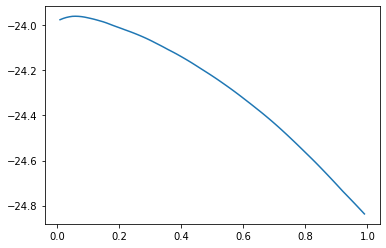

In [10]:
### MODELO: Lasso Regression -> não tenta "overfit" (dataset vai ser muito disperso devido á quantidade de dummy variables e isto ajuda a normalizar)
from sklearn.linear_model import Lasso

# criar modelo 
lm_l = Lasso(alpha=0.06)

# treinar modelo
lm_l.fit(X_train, y_train)

print(lm_l.score(X_train,y_train))
print(lm_l.score(X_test,y_test))


#print(np.mean(cross_val_score(lm_l, X_train, y_train, scoring="neg_mean_absolute_error",cv=3)))  # mostra quão longe estamos em avg da nossa predição (por ex: se for 10, estamos em avg desviados por 10 mil$)



# tentar diferentes valores Alpha (ver qual performa melhor)
alpha = []
error = []
for i in range(1,101):
    alpha.append(i/101)
    lm_lasso = Lasso(alpha=(i/101))
    error.append(np.mean(cross_val_score(lm_lasso, X_train, y_train, scoring="neg_mean_absolute_error",cv=3)))
plt.plot(alpha,error)
# best point: cerca de 0.06 

# perceber best point ao pormenor
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns=["alpha","error"])
best_point = df_err[df_err["error"]==max(df_err["error"])]
display(best_point)

# melhoria significativa!! Foi de -9785790.229 para -15.264

In [11]:
### MODELO: Random Forest Regression (Model Tree para comparar aos Lineares)
# shuffles the Data e selecionam aleatóriamente algumas Features
# algumas trees focam-se numa parte da Data, outras noutras, dps juntam-se para votar

# faz sentido usar isto, pq temos muitos dummies
from sklearn.ensemble import RandomForestRegressor

# criar modelo
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))


#print(np.mean(cross_val_score(rf, X_train, y_train, scoring="neg_mean_absolute_error",cv=3)))  # -15.249  -> melhoria


0.8159375284692876
0.1786818407534032


In [ ]:
### MODELO: GridSearchCV  (passa por todas as combinações de HyperParameters e determina/escolhe a combinação mais Accurate)
from sklearn.model_selection import GridSearchCV  

# dict de HyperParameters para definir o q consideramos serem os melhores HyperParameters
parameters = {"n_estimators":range(10,300,20), 
              "criterion":["mse","mae"], 
              "max_features":["auto","sqrt","log2"]}
# outros parametros:
# max_depth
# cv=[1,10,1]


# criar modelo
gs = GridSearchCV(rf, param_grid=parameters, scoring="neg_mean_absolute_error",cv=3)

# treinar modelo
gs.fit(X_train,y_train)

In [ ]:
# ver qual a melhor combinação de parâmetros! 
print(gs.best_params_)
print(gs.best_estimator_)
# score
print(gs.best_score_)

In [ ]:
### Test Ensembles (usar diferentes Models para prever o Test e ver se temos resultados idênticos)


# testar algoritmo (Linear Regression)
t_pred_lm = lm.predict(X_test)
# testar algoritmo (Lasso Regression)
t_pred_lm_l = lm_l.predict(X_test)  # vamos acima mudar valor de Alpha para Best Point
t_pred_rf = gs.best_estimator_.predict(X_test)

print(t_pred_lm)
print(t_pred_lm_l)
print(t_pred_rf)

In [ ]:
from sklearn.metrics import mean_absolute_error 

print(mean_absolute_error(y_test,t_pred_lm))
print(mean_absolute_error(y_test,t_pred_lm_l))
print(mean_absolute_error(y_test,t_pred_rf))


from sklearn.metrics import r2_score

print("R-squared:",r2_score(y_test, t_pred_lm))
print("R-squared:",r2_score(y_test, t_pred_lm_l))
print("R-squared:",r2_score(y_test, t_pred_rf))

In [ ]:
print(mean_absolute_error(y_test,(t_pred_lm_l + t_pred_rf)/2))

print("R-squared:",r2_score(y_test, (t_pred_lm_l + t_pred_rf)/2))

In [12]:
# PICKLE (para Flask no Spyder)
import pickle

pickle.dump(rf,open("model.pkl","wb"))

In [ ]:
5. Model Production (Flask API)
# website: manda-nos informação relativa a um trabalho
# API: manda-nos o salário q se espera

### CHAMAR no Acaconda Prompt -> cd Desktop, cd FlaskAPI, python app.py      Running on "print and paste on chrome"